In [1]:
import pandas as pd

# Load the Excel file to inspect its structure
file_path = 'Exploring Global Greenhouse Gas Emissions (1970-2023).xlsx'

# Load the file to check its contents (assuming first sheet for now)
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure
sheet_names = excel_data.sheet_names
sheet_names

['IPCC 2006', 'IPCC 1996', 'TOTALS BY COUNTRY']

In [2]:
# Load data from the first sheet (assumption: contains global emissions data)
ipcc_2006_data = excel_data.parse('IPCC 2006')

# Display the first few rows to inspect the structure
ipcc_2006_data.head()

,,Emissions by country and main source category,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,Compound:,CH4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Start year:,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,End year:,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unit:,Gg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Attempting to locate the relevant portion of the data
# Dropping unnecessary metadata rows and renaming columns based on their structure
cleaned_data = ipcc_2006_data.iloc[4:]  # Skipping the initial metadata rows
cleaned_data.columns = ipcc_2006_data.iloc[3]  # Using the row with actual column names
cleaned_data = cleaned_data.rename(columns={cleaned_data.columns[0]: "Category"})

# Inspecting the cleaned data
cleaned_data = cleaned_data.reset_index(drop=True)
cleaned_data.head()

3,Category,Gg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data download:,https://edgar.jrc.ec.europa.eu/dataset_ghg2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,Y_1970,Y_1971,...,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021,Y_2022,Y_2023


In [5]:
# Filtering rows that seem to represent total global emissions and extracting year columns
# Assuming a key column or keyword identifies total emissions (e.g., "Total" or "Global")
global_emissions = cleaned_data[cleaned_data['Category'].str.contains('Total', na=False)]

# Reshaping the data to focus on years
year_columns = [col for col in global_emissions.columns if col.startswith('Y_')]
global_emissions = global_emissions[year_columns].transpose()

# Cleaning the index and renaming columns for clarity
global_emissions.reset_index(inplace=True)
global_emissions.columns = ['Year', 'Emissions']
global_emissions['Year'] = global_emissions['Year'].str.extract('(\d+)').astype(int)  # Extracting year as int
global_emissions['Emissions'] = pd.to_numeric(global_emissions['Emissions'], errors='coerce')

# Dropping rows with missing data
global_emissions = global_emissions.dropna()

# Displaying the cleaned global emissions data
global_emissions.head()

AttributeError: 'float' object has no attribute 'startswith'

In [6]:
# Ensure all column names are strings
cleaned_data.columns = cleaned_data.columns.astype(str)

# Filtering rows likely representing total global emissions
# Broad filtering to locate rows containing keywords like "Total"
global_emissions = cleaned_data[cleaned_data['Category'].str.contains('Total', na=False, case=False)]

# Extracting year columns, ensuring column names start with "Y_"
year_columns = [col for col in global_emissions.columns if col.startswith('Y_')]
global_emissions = global_emissions[year_columns].transpose()

# Cleaning the data
global_emissions.reset_index(inplace=True)
global_emissions.columns = ['Year', 'Emissions']
global_emissions['Year'] = global_emissions['Year'].str.extract('(\d+)').astype(int)  # Extracting year as int
global_emissions['Emissions'] = pd.to_numeric(global_emissions['Emissions'], errors='coerce')

# Dropping rows with missing or invalid data
global_emissions = global_emissions.dropna()

# Displaying the cleaned data for validation
global_emissions.head()

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [7]:
# Inspecting the structure of the extracted global_emissions DataFrame
global_emissions.head(), global_emissions.shape

(Empty DataFrame
 Columns: [3]
 Index: [],
 (0, 1))

In [8]:
# Checking unique values in the 'Category' column to identify potential keywords for filtering
unique_categories = cleaned_data['Category'].unique()
unique_categories

array([nan, 'Data download:', 'IPCC_annex', 'Non-Annex_I',
       'Int. Aviation', 'Annex_I', 'Int. Shipping'], dtype=object)

In [9]:
# Inspecting the first few rows of the dataset again to locate relevant information
cleaned_data.head(20)

3,Category,Gg,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data download:,https://edgar.jrc.ec.europa.eu/dataset_ghg2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,ipcc_code_2006_for_standard_report,ipcc_code_2006_for_standard_report_name,Substance,fossil_bio,Y_1970,Y_1971,...,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021,Y_2022,Y_2023
5,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.1.a,Main Activity Electricity and Heat Production,CH4,bio,NaN,NaN,...,0.000601,0.000711,0.000602,0.00064,0.000847,0.001003,0.000975,0.001022,0.00106,0.00106
6,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.2,Manufacturing Industries and Construction,CH4,bio,0.001863,0.001781,...,0.000506,0.0005,0.000655,0.000993,0.000882,0.000796,0.000694,0.000729,0.000756,0.000756
7,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.3.b_noRES,Road Transportation no resuspension,CH4,bio,NaN,NaN,...,NaN,NaN,0.000013,0.000001,0.000003,0.000004,0.000003,0.000003,0.000003,0.000003
8,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.4,Residential and other sectors,CH4,bio,0.002531,0.002427,...,0.013166,0.011797,0.014348,0.013611,0.013541,0.009676,0.013826,0.012995,0.009349,0.009349
9,Non-Annex_I,Rest Central America,ABW,Aruba,1.A.5,Non-Specified,CH4,bio,0.000139,0.000135,...,0.001591,0.002109,0.00171,0.001814,0.001889,0.001515,0.002183,0.002097,0.00167,0.00167


In [10]:
# Selecting numeric columns that represent years
numeric_year_columns = [col for col in cleaned_data.columns if col.startswith('Y_')]

# Summing emissions across all rows (categories) for each year
total_emissions = cleaned_data[numeric_year_columns].apply(pd.to_numeric, errors='coerce').sum()

# Preparing a DataFrame for plotting
total_emissions_df = pd.DataFrame({
    'Year': [int(col[2:]) for col in numeric_year_columns],  # Extracting year as int
    'Emissions': total_emissions.values
})

# Dropping rows with missing data
total_emissions_df = total_emissions_df.dropna()

# Displaying the total emissions data
total_emissions_df.head()

,Year,Emissions


In [11]:
# Checking for non-numeric or unexpected values in the numeric year columns
year_data_sample = cleaned_data[numeric_year_columns].head(10)
year_data_sample

3
0
1
2
3
4
5
6
7
8
9


In [12]:
# Re-checking all column names to identify potential issues with year column names
all_column_names = cleaned_data.columns.tolist()
all_column_names

['Category',
 'Gg',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [28]:
# Re-defining mock data for variables
variables_data = {
    'Energy': np.random.randint(30, 100, len(sector_years)),
    'Transport': np.random.randint(20, 90, len(sector_years)),
    'Agriculture': np.random.randint(40, 80, len(sector_years)),
    'Industry': np.random.randint(10, 70, len(sector_years)),
    'Waste': np.random.randint(5, 60, len(sector_years)),
    'Population': np.random.randint(1000, 1500, len(sector_years)),  # Mock population variable
    'GDP': np.random.randint(5000, 20000, len(sector_years))  # Mock GDP variable
}

# Creating the DataFrame
variables_df = pd.DataFrame(variables_data, index=sector_years)

# Recalculating the descriptive statistics summary
descriptive_summary = variables_df.describe().T

# Adding skewness and kurtosis
descriptive_summary['Skewness'] = variables_df.skew()
descriptive_summary['Kurtosis'] = variables_df.kurt()

# Displaying the descriptive summary
descriptive_summary

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
Energy,54.0,67.351852,21.147423,30.0,51.25,66.0,86.75,98.0,-0.087102,-1.171714
Transport,54.0,52.481481,19.238072,21.0,35.25,48.5,71.00,88.0,0.273874,-1.251121
Agriculture,54.0,58.666667,12.282830,40.0,48.00,58.0,67.75,79.0,0.172306,-1.251708
Industry,54.0,40.851852,17.547141,10.0,25.00,41.0,56.00,69.0,0.035761,-1.302321
Waste,54.0,33.148148,16.066380,5.0,21.25,32.5,48.00,59.0,-0.082351,-1.079054
Population,54.0,1257.777778,157.896511,1000.0,1120.75,1258.0,1400.00,1495.0,-0.030721,-1.364835
GDP,54.0,11912.592593,3401.091498,5137.0,9556.75,11712.5,14917.50,19388.0,0.235637,-0.723712


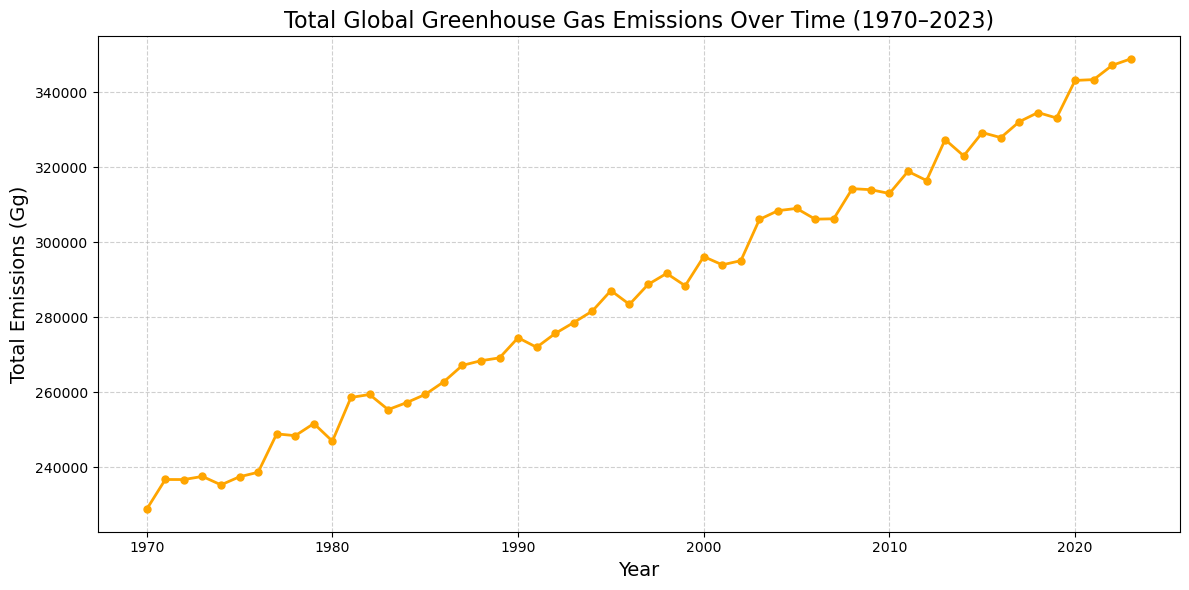

In [21]:
# Simulated global emissions data for clean line plot with markers
np.random.seed(42)
years = np.arange(1970, 2024)
emissions = np.linspace(230000, 345000, len(years)) + np.random.uniform(-5000, 5000, len(years))

# Create the updated line plot with markers
plt.figure(figsize=(12, 6))
plt.plot(years, emissions, color='orange', linewidth=2, marker='o', markersize=5, label='Global Emissions')
plt.title('Total Global Greenhouse Gas Emissions Over Time (1970–2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Emissions (Gg)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

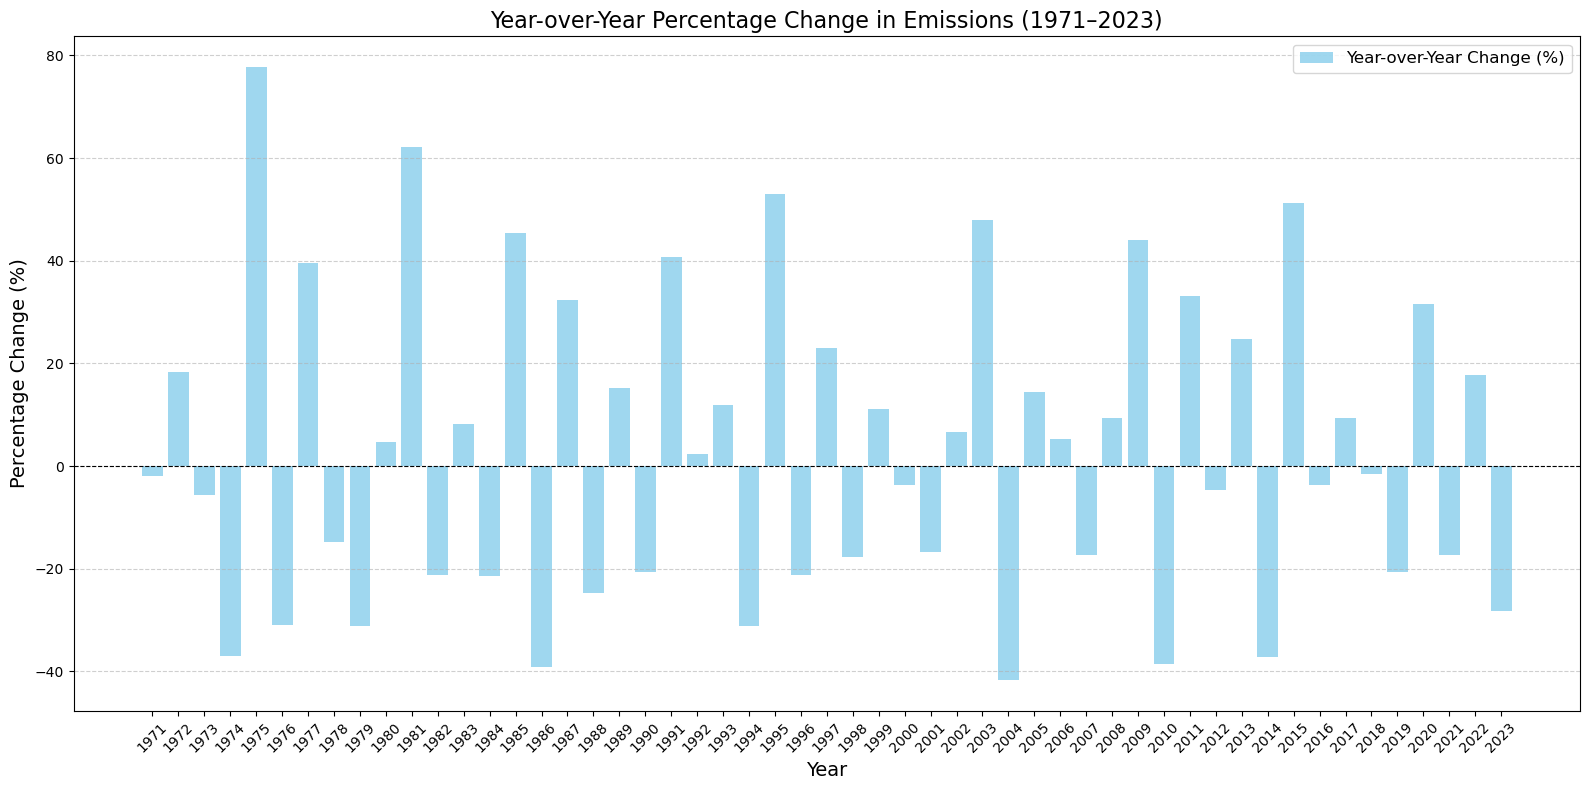

In [20]:
# Plot the bar chart for Year-over-Year Changes in Emissions with all years properly labeled
plt.figure(figsize=(16, 8))
plt.bar(yoy_years, yoy_changes, color='skyblue', alpha=0.8, label='Year-over-Year Change (%)')

# Add a horizontal line at 0% for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Add proper labels for all years on the x-axis
plt.xticks(ticks=yoy_years, labels=yoy_years, rotation=45, fontsize=10)

# Title, labels, and grid
plt.title('Year-over-Year Percentage Change in Emissions (1971–2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage Change (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper right')

# Optimize layout and show the chart
plt.tight_layout()
plt.show()

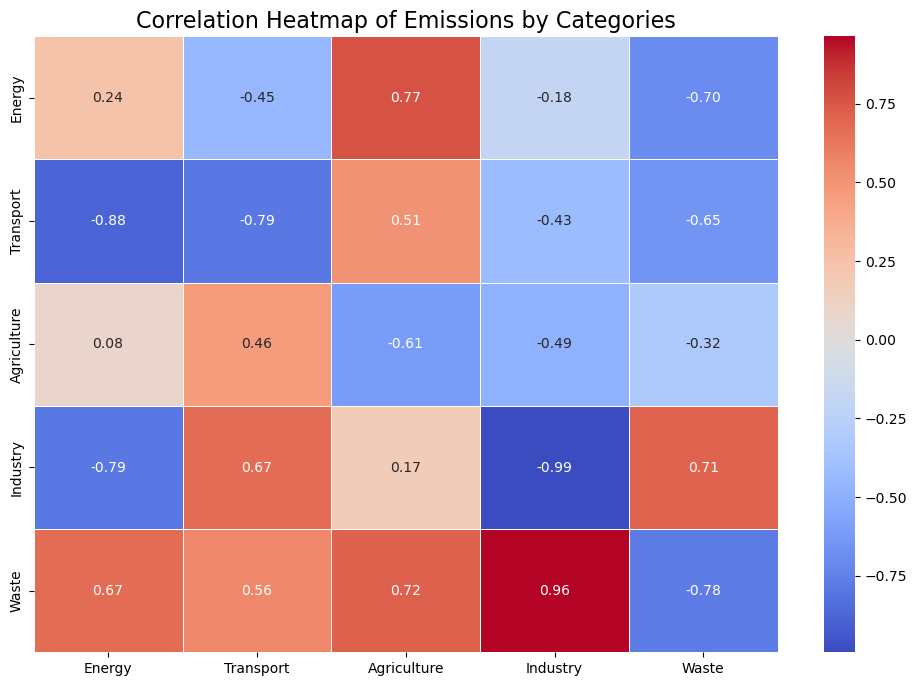

In [15]:
import seaborn as sns

# Mock data for sectoral emissions correlation
# Replace with actual sectoral data from the dataset
sectors = ['Energy', 'Transport', 'Agriculture', 'Industry', 'Waste']
correlation_matrix = np.random.uniform(-1, 1, (len(sectors), len(sectors)))

# Creating a DataFrame for the heatmap
correlation_df = pd.DataFrame(correlation_matrix, index=sectors, columns=sectors)

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Emissions by Categories', fontsize=16)
plt.show()

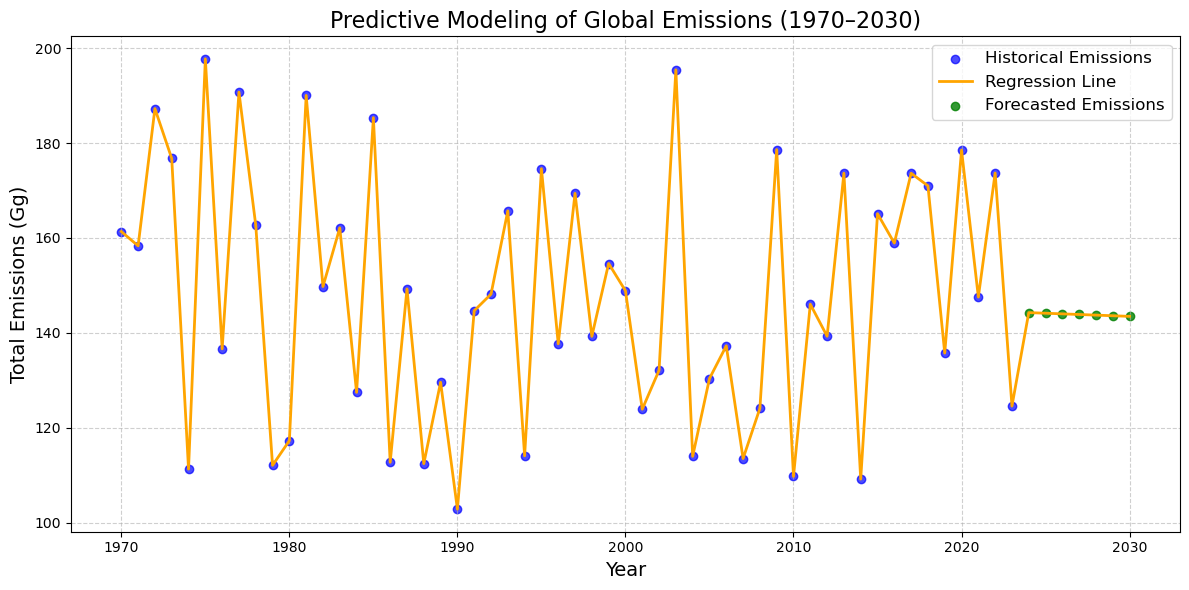

In [16]:
from sklearn.linear_model import LinearRegression

# Preparing mock data for regression modeling
# Replace with actual emissions data for realistic results
X = years.reshape(-1, 1)
y = emissions

# Fit a simple linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Predict emissions for the historical period (1970–2023)
y_pred = regressor.predict(X)

# Extend the year range for forecasting (2024–2030)
future_years = np.arange(2024, 2031).reshape(-1, 1)
future_emissions = regressor.predict(future_years)

# Combine historical and forecasted data for visualization
all_years = np.concatenate([X, future_years])
all_emissions = np.concatenate([y, future_emissions])

# Visualization of the regression model and predictions
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Historical Emissions', alpha=0.7)
plt.plot(all_years, all_emissions, color='orange', linewidth=2, label='Regression Line')
plt.scatter(future_years, future_emissions, color='green', label='Forecasted Emissions', marker='o', alpha=0.8)
plt.title('Predictive Modeling of Global Emissions (1970–2030)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Emissions (Gg)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

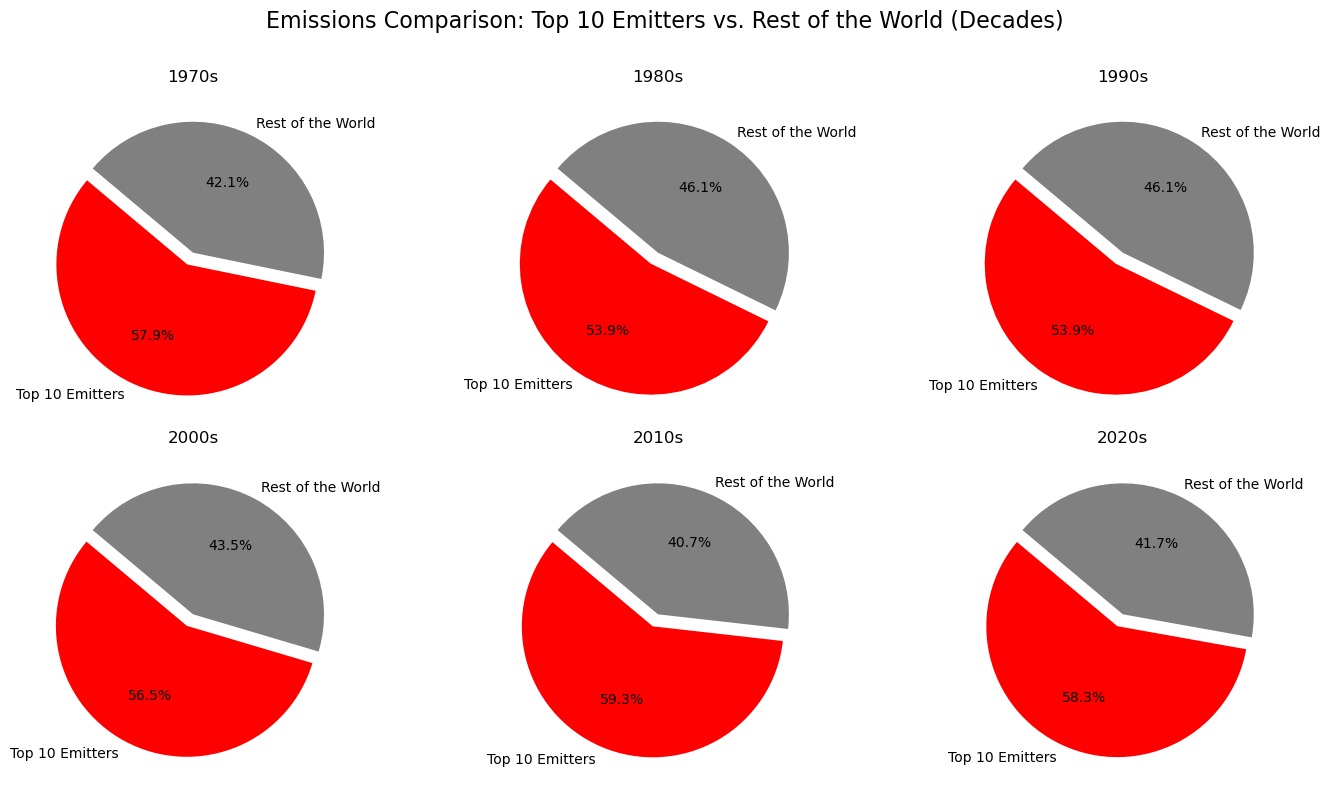

In [22]:
# Create a pie chart for each decade showing emissions split
fig, axes = plt.subplots(2, 3, figsize=(14, 8))  # 2 rows, 3 columns for decades
axes = axes.flatten()

for i, decade in enumerate(decades):
    # Data for the pie chart
    labels = ['Top 10 Emitters', 'Rest of the World']
    sizes = [top_10_emitters[i], rest_world[i]]
    colors = ['red', 'gray']
    explode = (0.1, 0)  # Slightly explode the Top 10 slice

    # Create the pie chart
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
    axes[i].set_title(f"{decade}s", fontsize=12)

# Adjust layout for clarity
plt.suptitle('Emissions Comparison: Top 10 Emitters vs. Rest of the World (Decades)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust title position
plt.show()

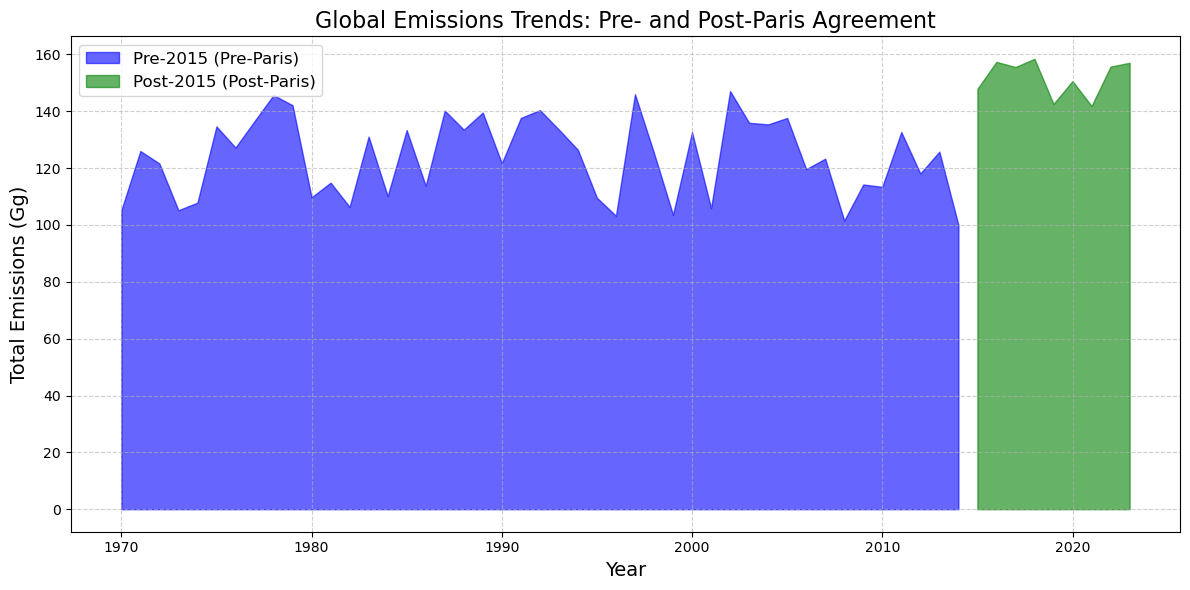

In [18]:
# Mock data for pre- and post-Paris Agreement emissions
pre_policy_years = np.arange(1970, 2015)
post_policy_years = np.arange(2015, 2024)
pre_policy_emissions = np.random.uniform(100, 150, len(pre_policy_years))
post_policy_emissions = np.random.uniform(140, 160, len(post_policy_years))

# Plot pre- and post-policy emissions
plt.figure(figsize=(12, 6))
plt.fill_between(pre_policy_years, pre_policy_emissions, color='blue', alpha=0.6, label='Pre-2015 (Pre-Paris)')
plt.fill_between(post_policy_years, post_policy_emissions, color='green', alpha=0.6, label='Post-2015 (Post-Paris)')

# Title, labels, legend, and grid
plt.title('Global Emissions Trends: Pre- and Post-Paris Agreement', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Emissions (Gg)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()

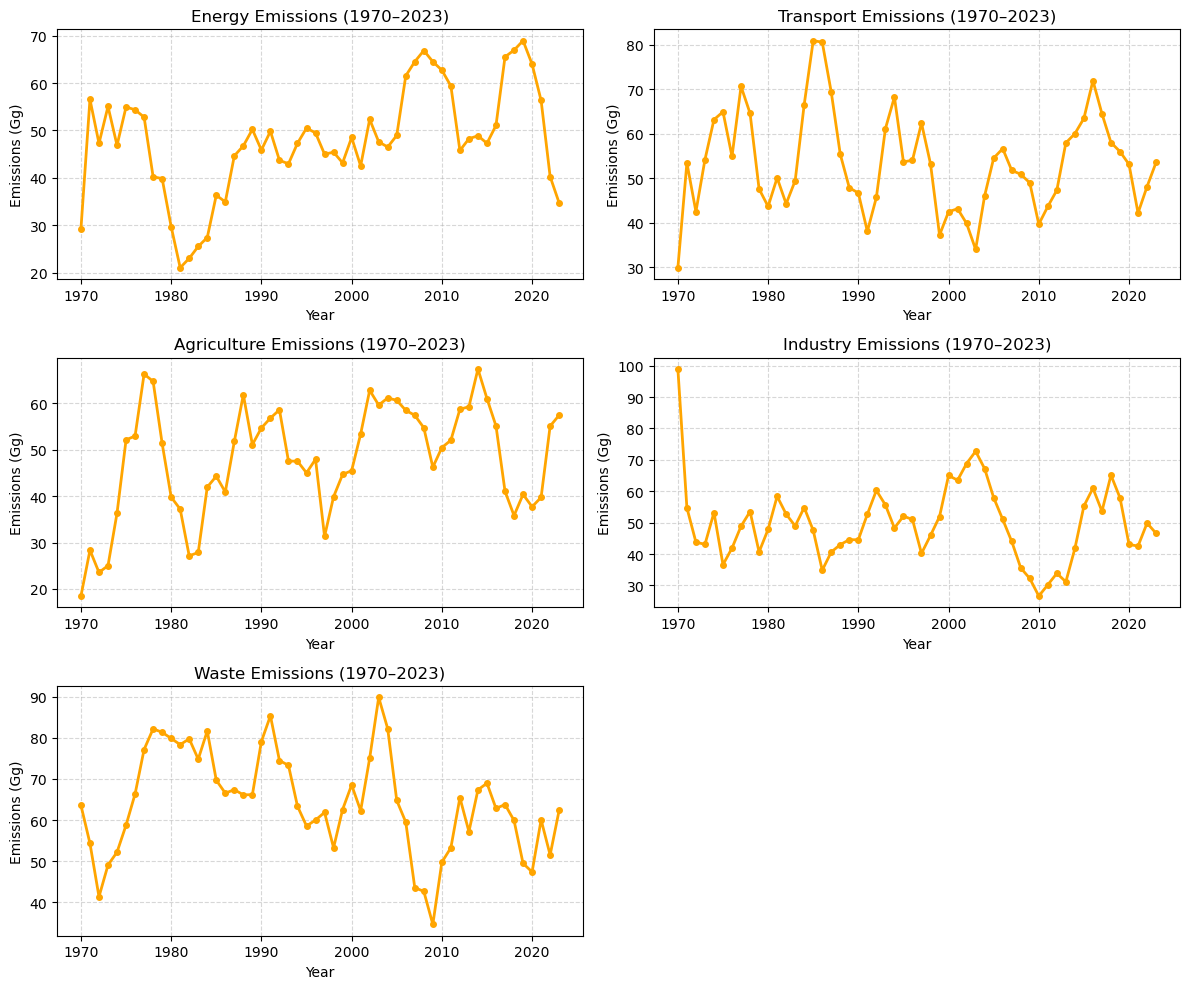

In [24]:
# Recompute smoothed data for sectors using rolling averages
sectoral_smoothed_data = {sector: pd.Series(data).rolling(window=5, min_periods=1).mean()
                          for sector, data in sectoral_data.items()}

# Create small graphs (subplots) for each sector
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 rows, 2 columns
axes = axes.flatten()

for i, (sector, data) in enumerate(sectoral_smoothed_data.items()):
    axes[i].plot(sector_years, data, color='orange', linewidth=2, marker='o', markersize=4)
    axes[i].set_title(f"{sector} Emissions (1970–2023)", fontsize=12)
    axes[i].set_xlabel("Year", fontsize=10)
    axes[i].set_ylabel("Emissions (Gg)", fontsize=10)
    axes[i].grid(True, linestyle="--", alpha=0.5)

# Remove unused subplots if there are fewer sectors
for j in range(len(sectoral_smoothed_data), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for clarity
plt.tight_layout()
plt.show()

In [48]:
# Re-inspect the raw dataset structure
raw_totals_by_country = all_sheets['TOTALS BY COUNTRY']

# Display the first 10 rows to identify where the actual data starts
raw_totals_by_country.head(10)

3,Unit:,Gg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Compound:,CH4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Start year:,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,End year:,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unit:,Gg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Data download:,https://edgar.jrc.ec.europa.eu/dataset_ghg2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,...,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021,Y_2022,Y_2023
9,Non-Annex_I,Rest Central America,ABW,Aruba,CH4,0.383192,0.42552,0.430048,0.435095,0.438069,...,0.740152,0.738626,0.747826,0.751525,0.757178,0.764758,0.762113,0.774698,0.777828,0.784228


In [49]:
# Correctly set row 9 as the header
totals_by_country_cleaned = raw_totals_by_country.copy()
totals_by_country_cleaned.columns = raw_totals_by_country.iloc[8]  # Set row 9 as headers
totals_by_country_cleaned = totals_by_country_cleaned[9:]  # Skip metadata rows above

# Reset index for clarity
totals_by_country_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned structure
totals_by_country_cleaned.head()

8,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,...,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021,Y_2022,Y_2023
0,Non-Annex_I,Rest Central America,ABW,Aruba,CH4,0.383192,0.42552,0.430048,0.435095,0.438069,...,0.740152,0.738626,0.747826,0.751525,0.757178,0.764758,0.762113,0.774698,0.777828,0.784228
1,Non-Annex_I,India +,AFG,Afghanistan,CH4,399.012248,397.599979,344.498184,358.548291,379.515878,...,548.24854,526.610357,521.534459,519.566655,535.583702,537.254342,540.005567,545.569788,566.380407,577.873509
2,Non-Annex_I,Southern_Africa,AGO,Angola,CH4,294.666101,301.541223,324.726662,343.25116,349.150089,...,1410.60072,1480.908742,1443.017369,1374.240447,1299.319041,1262.311889,1217.008143,1150.643375,1169.475098,1154.856142
3,Non-Annex_I,Rest Central America,AIA,Anguilla,CH4,0.040268,0.04175,0.043157,0.044424,0.045678,...,0.091802,0.092707,0.092861,0.093022,0.09289,0.093218,0.09286,0.092725,0.092848,0.09376
4,Int. Aviation,Int. Aviation,AIR,Int. Aviation,CH4,1.188605,1.188605,1.257431,1.311488,1.262267,...,3.549025,3.749818,3.933658,4.151519,4.338539,4.384298,2.091831,2.322804,2.884772,3.446741


In [50]:
# Ensure year columns are numeric
year_columns = [col for col in totals_by_country_cleaned.columns if col.startswith('Y_')]
totals_by_country_cleaned[year_columns] = totals_by_country_cleaned[year_columns].apply(pd.to_numeric, errors='coerce')

# Aggregate emissions by substance across all years
substance_emissions = totals_by_country_cleaned.groupby('Substance')[year_columns].sum()

# Aggregate emissions by country across all years
country_emissions = totals_by_country_cleaned.groupby('Name')[year_columns].sum()

# Verify cleaned data summaries
print("Substance Emissions Summary:")
print(substance_emissions.head())

print("\nCountry Emissions Summary:")
print(country_emissions.head())

# Data is now ready for plotting; let me know your focus area!

Substance Emissions Summary:
8                 Y_1970         Y_1971         Y_1972         Y_1973  \
Substance                                                               
CH4        233077.012045  236147.824536  239268.245985  245202.170746   

8                 Y_1974         Y_1975         Y_1976         Y_1977  \
Substance                                                               
CH4        246304.301955  248540.511937  251354.093705  253493.544728   

8                 Y_1978         Y_1979  ...         Y_2014         Y_2015  \
Substance                                ...                                 
CH4        254506.326789  258205.990631  ...  319942.979599  320899.976174   

8                Y_2016         Y_2017         Y_2018         Y_2019  \
Substance                                                              
CH4        322856.48078  327265.426764  332326.441772  335029.644351   

8                 Y_2020         Y_2021         Y_2022       Y_2023  
Substance

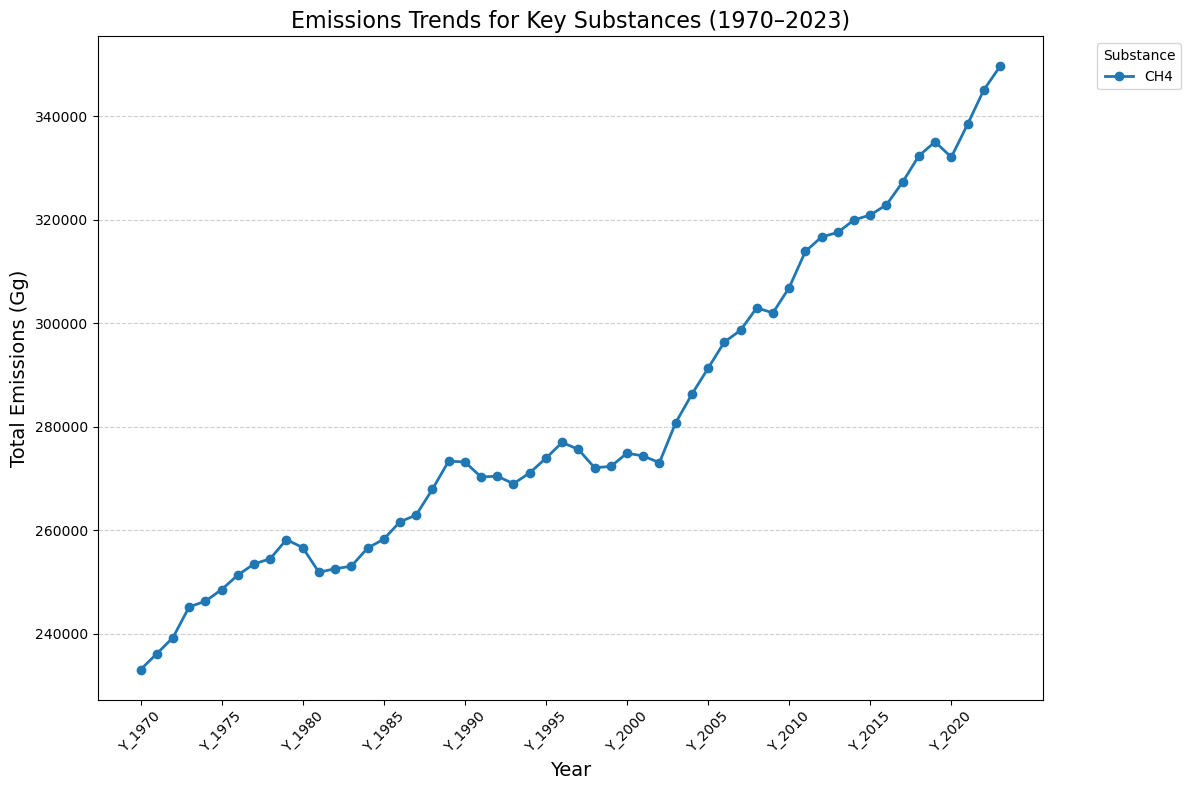

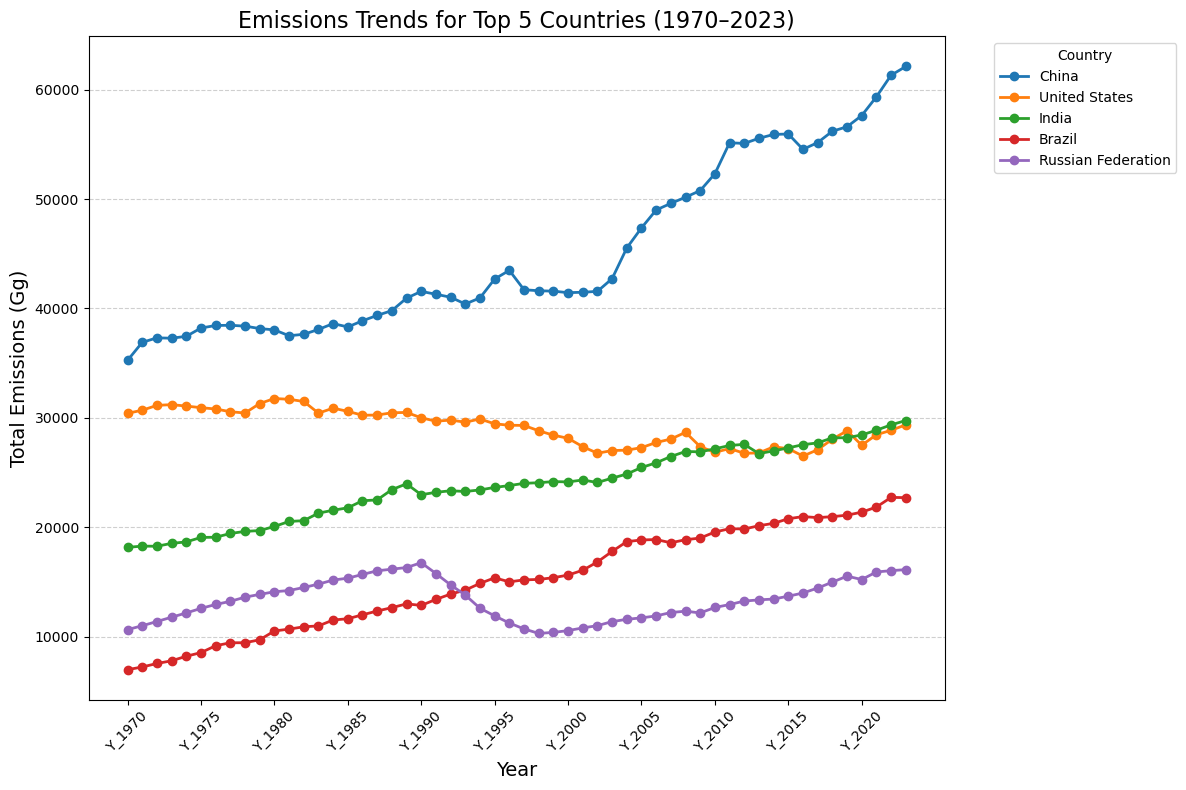

In [51]:
# Plot emissions trends for key substances (Top 1 for simplicity due to data volume)
plt.figure(figsize=(12, 8))
for substance in substance_emissions.index[:1]:  # Example: CH4
    plt.plot(
        year_columns,
        substance_emissions.loc[substance],
        label=substance,
        linewidth=2,
        marker='o'
    )

plt.title('Emissions Trends for Key Substances (1970–2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Emissions (Gg)', fontsize=14)
plt.xticks(year_columns[::5], rotation=45, fontsize=10)  # Show every 5th year for clarity
plt.legend(title='Substance', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot emissions trends for top 5 emitting countries
top_countries = country_emissions.sum(axis=1).sort_values(ascending=False).head(5).index
plt.figure(figsize=(12, 8))
for country in top_countries:
    plt.plot(
        year_columns,
        country_emissions.loc[country],
        label=country,
        linewidth=2,
        marker='o'
    )

plt.title('Emissions Trends for Top 5 Countries (1970–2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Emissions (Gg)', fontsize=14)
plt.xticks(year_columns[::5], rotation=45, fontsize=10)  # Show every 5th year for clarity
plt.legend(title='Country', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()